In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../../Data/drinks.csv')
df.head()

/Users/Ted/Desktop/Data-Science-Practice/Jupyter Notebooks/Pandas/practice problems


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [7]:
# mean beer servings
df.beer_servings.mean()

np.float64(106.16062176165804)

In [11]:
# df[df.continent=='Europe'].beer_servings.mean()
df.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [12]:
df.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

<Axes: xlabel='continent'>

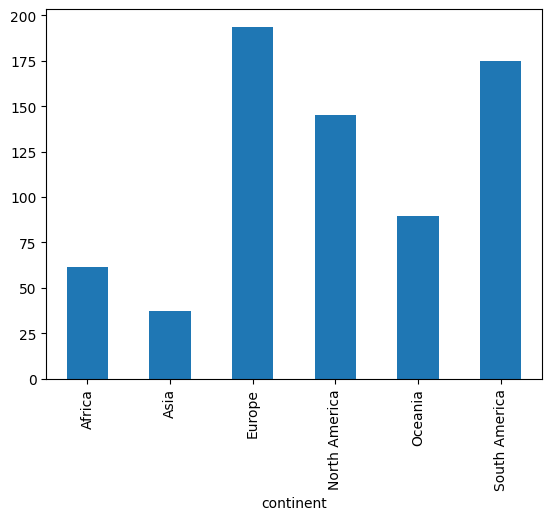

In [13]:
df.groupby('continent').beer_servings.mean().plot(kind='bar')

In [15]:
def peak_to_peak(group):
    return group.max() - group.mean()

df.groupby('continent').beer_servings.apply(peak_to_peak)

continent
Africa           314.528302
Asia             209.954545
Europe           167.222222
North America    139.565217
Oceania          216.312500
South America    157.916667
Name: beer_servings, dtype: float64

In [17]:
# top five countries with highest wine servings
def top5(group):
    return group.sort_values('wine_servings', ascending=False).head(5)

df.groupby('continent').apply(top5)

/var/folders/73/qcrsdy597xv51xvfmxk30stm0000gn/T/ipykernel_57946/3709459709.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('continent').apply(top5)


country  beer_servings  spirit_servings  \
continent                                                                
Africa        55     Equatorial Guinea             92                0   
              148  Sao Tome & Principe             56               38   
              159         South Africa            225               76   
              62                 Gabon            347               98   
              152           Seychelles            157               25   
Asia          92                  Laos             62                0   
              141   Russian Federation            247              326   
              177         Turkmenistan             19               71   
              94               Lebanon             20               55   
              167                Syria              5               35   
Europe        61                France            127              151   
              136             Portugal            194               67   
              3                Andorra            245              138   
              166          Switzerland            185              100   
              48               Denmark            224               81   
North America 32                Canada            240              122   
              184                  USA            249              158   
              144            St. Lucia            171              315   
              11               Bahamas            122              176   
              5      Antigua & Barbuda            102              128   
Oceania       8              Australia            261               72   
              121          New Zealand            203               79   
              40          Cook Islands              0              254   
              146                Samoa            105               18   
              129                Palau            306               63   
South America 6              Argentina            193               25   
              185              Uruguay            115               35   
              35                 Chile            130              124   
              132             Paraguay            213              117   
              133                 Peru            163              160   

                   wine_servings  total_litres_of_pure_alcohol      continent  
continent                                                                      
Africa        55             233                           5.8         Africa  
              148            140                           4.2         Africa  
              159             81                           8.2         Africa  
              62              59                           8.9         Africa  
              152             51                           4.1         Africa  
Asia          92             123                           6.2           Asia  
              141             73                          11.5           Asia  
              177             32                           2.2           Asia  
              94              31                           1.9           Asia  
              167             16                           1.0           Asia  
Europe        61             370                          11.8         Europe  
              136            339                          11.0         Europe  
              3              312                          12.4         Europe  
              166            280                          10.2         Europe  
              48             278                          10.4         Europe  
North America 32             100                           8.2  North America  
              184             84                           8.7  North America  
              144             71                          10.1  North America  
              11              51                           6.3

In [34]:
# Get row for Georgia
df.loc[df['country'] == 'Georgia']

# Rank countries based on wine_servings in descending order
df['rank'] = df['wine_servings'].rank(ascending=False, method='min')

# Get the rank of Georgia
georgia_rank = df.loc[df['country'] == 'Georgia', 'rank'].values[0]

# Show the rank of Georgia
print(f"Georgia ranks {int(georgia_rank)} in wine servings.")

Georgia ranks 26 in wine servings.


In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../../Data/tips.csv')
df.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


<Axes: xlabel='smoker'>

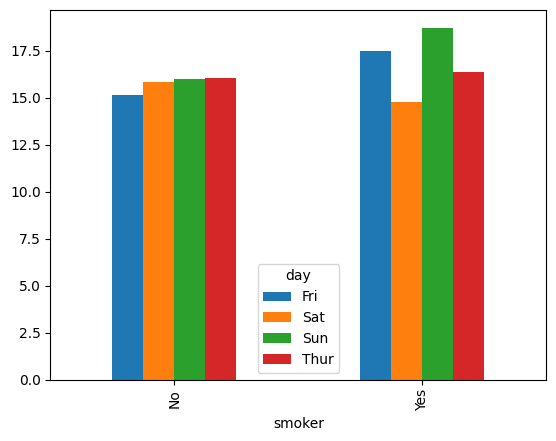

In [40]:
df['tip_pct'] = (df['tip'] / df['total_bill']) * 100
df.groupby(['day','smoker']).tip_pct.mean().unstack(level=0).plot(kind='bar')